In [111]:
import torch
import torch.nn as nn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [112]:
df=pd.read_csv("PYTORCH_NOTEBOOKS/Data/iris.csv")

In [113]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [114]:
df["target"].value_counts()

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

In [115]:
y=df["target"].values

In [116]:
X=df.drop(columns="target").values

In [117]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [118]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33)

In [121]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

y_train=torch.LongTensor(y_train).reshape(-1,1)
y_test=torch.LongTensor(y_test).reshape(-1,1)

In [122]:
#bu yaptığımız scikitlearn ile yapma

In [123]:
from torch.utils.data import DataLoader,TensorDataset

In [124]:
iris_data=TensorDataset(torch.FloatTensor(X),torch.LongTensor(y))
#data birleştirdik

In [125]:
for i in iris_data:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

In [126]:
iris_loader=DataLoader(batch_size=50,shuffle=True,dataset=iris_data)

In [127]:
for i, batch in enumerate(iris_loader):
    print(batch)

[tensor([[5.7000, 2.9000, 4.2000, 1.3000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [7.9000, 3.8000, 6.4000, 2.0000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [5.0000, 3.5000, 1.3000, 0.3000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [5.5000, 2.5000, 4.0000, 1.3000],
        [5.6000, 2.5000, 3.9000, 1.1000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [7.6000, 3.0000, 6.6000, 2.1000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [7.7000, 2.8000, 6.7000, 2.0000],
        [6.4000, 2.8000, 5.6000, 2.1000],
        [5.0000, 3.4000, 1.6000, 0.4000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [6.5000, 3.2000, 5.1000, 2.0000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [6.3000, 2.5000, 4.9000, 1.5000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [5.6000, 2.7000, 4.2000, 

In [128]:
class Model(nn.Module):
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        super().__init__()
        self.fc1=nn.Linear(in_features,h1)
        self.fc2=nn.Linear(h1,h2)
        self.out=nn.Linear(h2,out_features)
    def forward(self, x):
        x = F.relu(self.fc1(x))  # İlk katman
        x = F.relu(self.fc2(x))  # İkinci katman
        x = self.out(x)          # Son katman (logits döner, softmax yok!)
        return x

In [129]:
model=Model()

In [130]:
criterion=nn.CrossEntropyLoss()

In [131]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [132]:
epochs=100
all_losses=[]
y_train = y_train.squeeze()

In [141]:
for i in range(epochs):
    y_pred=model.forward(X_train)
 
    loss=criterion(y_pred,y_train)

    all_losses.append(loss.detach().numpy())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f"Epoch [{i+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [1/100], Loss: 0.4333
Epoch [2/100], Loss: 0.4315
Epoch [3/100], Loss: 0.4296
Epoch [4/100], Loss: 0.4278
Epoch [5/100], Loss: 0.4259
Epoch [6/100], Loss: 0.4241
Epoch [7/100], Loss: 0.4222
Epoch [8/100], Loss: 0.4204
Epoch [9/100], Loss: 0.4186
Epoch [10/100], Loss: 0.4168
Epoch [11/100], Loss: 0.4149
Epoch [12/100], Loss: 0.4131
Epoch [13/100], Loss: 0.4113
Epoch [14/100], Loss: 0.4095
Epoch [15/100], Loss: 0.4076
Epoch [16/100], Loss: 0.4058
Epoch [17/100], Loss: 0.4040
Epoch [18/100], Loss: 0.4021
Epoch [19/100], Loss: 0.4003
Epoch [20/100], Loss: 0.3985
Epoch [21/100], Loss: 0.3966
Epoch [22/100], Loss: 0.3948
Epoch [23/100], Loss: 0.3930
Epoch [24/100], Loss: 0.3911
Epoch [25/100], Loss: 0.3893
Epoch [26/100], Loss: 0.3874
Epoch [27/100], Loss: 0.3856
Epoch [28/100], Loss: 0.3837
Epoch [29/100], Loss: 0.3819
Epoch [30/100], Loss: 0.3800
Epoch [31/100], Loss: 0.3782
Epoch [32/100], Loss: 0.3763
Epoch [33/100], Loss: 0.3745
Epoch [34/100], Loss: 0.3726
Epoch [35/100], Loss: 0

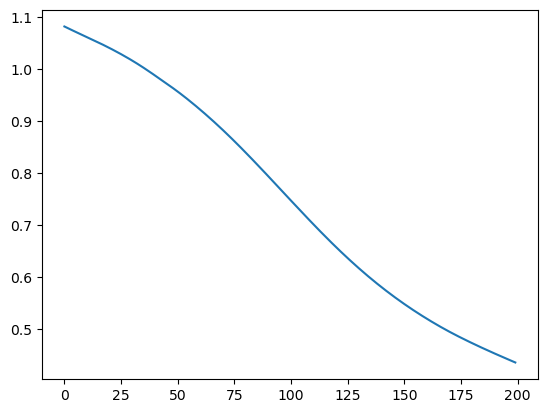

In [139]:

plt.plot(range(epochs*2),all_losses)
plt.show()

In [142]:
loss=0.0
y_test = y_test.squeeze()
with torch.no_grad():
    y_eval=model.forward(X_test)
    loss=criterion(y_eval,y_test)
print(loss)

tensor(0.2898)
